In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from music21 import *

In [2]:
centones = pd.read_csv("centones.csv")
centones.columns = ['istihlal','iraq arab','maya','sika','gharibat husayn']
relevant_centones = centones[['istihlal','maya','gharibat husayn']]
centones

,istihlal,iraq arab,maya,sika,gharibat husayn
0,"E, F, G","E, F, G","B-, A, G","C, D, E","F, E, D"
1,"G, F, E","C, D, E","E, F, G","A, G","E, F, G"
2,"C, B, A, G","F, E, D, C","B, D, C","E, F, G","A, G"
3,"A, G","A, G","A, G","G, E","G, E"
4,"E, D","D, C","C, E","G, A","B, C, D"
5,"F, E","C, D","B, C","E, F, D, E","B, D, C, B, A"
6,"G, F","A, B, C","G, F, E","E, D, C","E, D, C"
7,"E, F, A, G","F, E","F, G, E, F, E, D, C","G, F, E","C, D, E"
8,"F, E, D",NaN,NaN,NaN,"G, F, E"
9,"A, B, C",NaN,NaN,NaN,"E, F, D, E"


In [3]:
centone_streams = {tab : [stream.Stream() for i in range(centones[tab].count())] for tab in centones.columns }
for tab in centones.columns:
    for i in range(centones[tab].count()):
        centone_streams[tab][i].append([note.Note(j) for j in centones[tab][i].split(", ")])

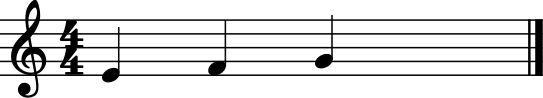

In [4]:
centone_streams['istihlal'][0].show()

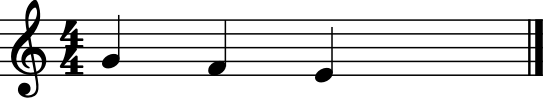

In [5]:
centone_streams['sika'][7].show()

In [6]:
music = converter.parse("SCORES/1ab3fe6b-0f46-4584-9abc-733d59c25c1b.xml")
#music.show()
full_piece_stream = music.recurse().notes
numoccur = pd.DataFrame([[len(search.noteNameSearch(full_piece_stream, motif)) for motif in centone_streams[tab]]for tab in centones.columns]).T
numoccur.columns = centones.columns

In [7]:
numoccur

,istihlal,iraq arab,maya,sika,gharibat husayn
0,14.0,14.0,0.0,28.0,29.0
1,15.0,28.0,14.0,0.0,14.0
2,0.0,29.0,0.0,14.0,0.0
3,0.0,0.0,0.0,11.0,11.0
4,85.0,56.0,0.0,0.0,6.0
5,97.0,28.0,7.0,0.0,0.0
6,15.0,0.0,15.0,29.0,29.0
7,0.0,97.0,0.0,15.0,28.0
8,29.0,NaN,NaN,NaN,15.0
9,0.0,NaN,NaN,NaN,0.0


<AxesSubplot:title={'center':'num occurences of centones by tab'}>

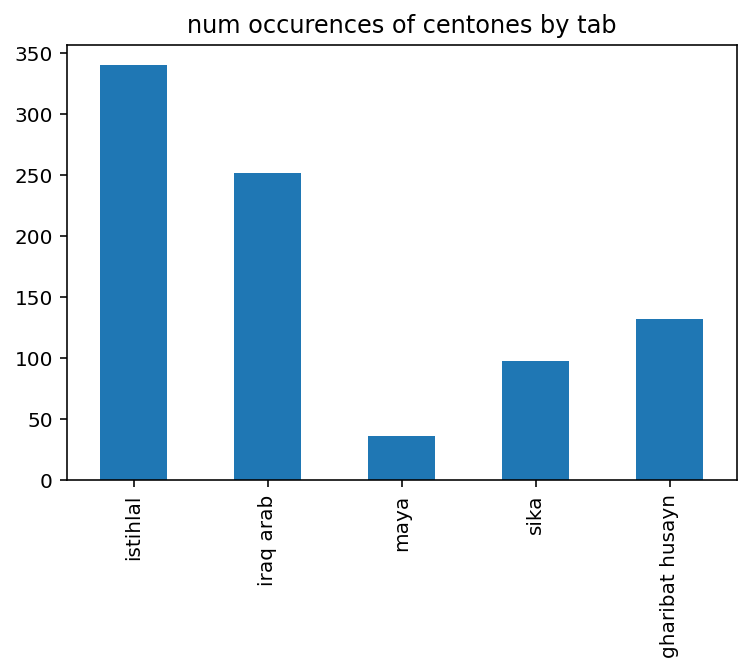

In [8]:
numoccur.sum().plot(title="num occurences of centones by tab",kind='bar')

<BarContainer object of 12 artists>

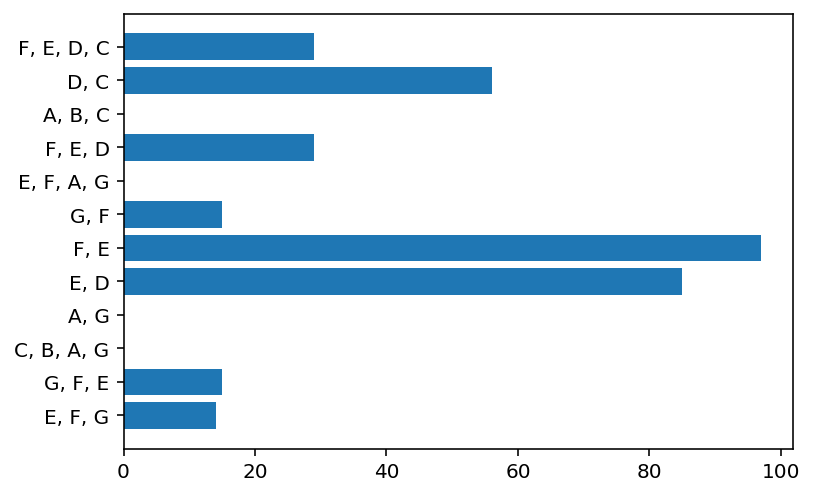

In [9]:
plt.barh(y=centones['istihlal'].values, width=numoccur['istihlal'].values)

In [10]:
metadata = []
for filename in os.listdir('SCORES'):
    f = os.path.join('SCORES', filename)
    try:
        title = pd.read_xml(f)['movement-title'][0]
        if title == 'Mshalia Isbahan_Tetuán':
            if pd.read_xml(f)['credit-words'][3] != 'Tradicional':
                title = pd.read_xml(f)['credit-words'][3]
    except:
            try:
                if pd.read_xml(f)['credit-words'][2] != 'Tradicional':
                    title = pd.read_xml(f)['credit-words'][2]
                else:
                    title = np.nan
            except:
                title = np.nan
    metadata.append([filename,title])
metadata = pd.DataFrame(metadata,columns=['filename','title'])

In [11]:
metadata.describe()

,filename,title
count,159,157
unique,159,89
top,dae13b1f-b7fd-4db3-af3c-11784d51d829.xml,Mshalia Isbahan_Tetuán
freq,1,31


In [12]:
#pd.read_xml(f"SCORES/{metadata[metadata['title']=='Mshalia Isbahan_Tetuán'].filename.values[0]}")

In [13]:
istihlal_files = metadata[metadata['title'].str.lower().str.contains('istihlal').fillna(False)].copy()
maya_files = metadata[metadata['title'].str.lower().str.contains('maya').fillna(False)].copy()
gharibat_files = metadata[metadata['title'].str.lower().str.contains('gharibat').fillna(False)].copy()

In [14]:
istihlal_files['tab'] = 'istihlal'
maya_files['tab'] = 'maya'
gharibat_files['tab'] = 'gharibat husayn'

In [15]:
relevant_files = pd.concat([istihlal_files,maya_files,gharibat_files])

In [16]:
relevant_files['mizan'] = relevant_files.apply(lambda x: x.title.lower().replace(x.tab,''), axis=1)
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('.mp3',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace(' al-',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_fes',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('raml',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_rabat',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('_',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('gharibat',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('husain',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('bawakir',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace(' ',''))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qaimwanisf','qaim wa nisf'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('mchalia','mshalia'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qouddami','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qouddam','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('qddam','quddam'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('btaihi','btayhi'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('darj','dary'))
relevant_files['mizan'] = relevant_files['mizan'].apply(lambda x: x.replace('bassit','basit'))
relevant_files = relevant_files.append(relevant_files.iloc[36])
relevant_files = relevant_files.reset_index().drop('index',axis=1)
relevant_files.iloc[36].mizan = 'btayhi'
relevant_files.iloc[43].mizan = 'quddam'

<ipython-input-16-eb4eea3dd9b6>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  relevant_files = relevant_files.append(relevant_files.iloc[36])


In [17]:
relevant_files

,filename,title,tab,mizan
0,4342021d-03a1-4727-8c0f-3c23180ef374.xml,Mshalia Istihlal,istihlal,mshalia
1,b3d92934-0946-4f2d-8183-312450d7e45e.xml,Mshalia Istihlal,istihlal,mshalia
2,9727ddbe-eb79-461b-9861-8a60336b17f6.xml,Mshalia Istihlal,istihlal,mshalia
3,a1eac726-208e-4c24-bd57-e34e9e93dcd3.xml,Quddam Istihlal,istihlal,quddam
4,6fe7108c-4e4f-457b-a363-ccf505bdee9a.xml,Btayhi Istihlal,istihlal,btayhi
5,2d2683c4-4b3e-4430-a254-c828427bdcc7.xml,Quddam al-Istihlal,istihlal,quddam
6,44183247-4857-40cd-82bc-b4e9e3f458f1.xml,Mshalia Istihlal,istihlal,mshalia
7,3e5a82a2-d806-45cc-876e-6fa8a2b5a61d.xml,Mshalia Istihlal,istihlal,mshalia
8,023b4a37-1ab4-4593-b03a-850ee0db8350.xml,QaimWaNisfistihlal1982,istihlal,qaim wa nisf
9,f461045b-50bc-4b20-a731-66fbd3a264ae.xml,Qouddam Istihlal,istihlal,quddam


In [18]:
relevant_centones

,istihlal,maya,gharibat husayn
0,"E, F, G","B-, A, G","F, E, D"
1,"G, F, E","E, F, G","E, F, G"
2,"C, B, A, G","B, D, C","A, G"
3,"A, G","A, G","G, E"
4,"E, D","C, E","B, C, D"
5,"F, E","B, C","B, D, C, B, A"
6,"G, F","G, F, E","E, D, C"
7,"E, F, A, G","F, G, E, F, E, D, C","C, D, E"
8,"F, E, D",NaN,"G, F, E"
9,"A, B, C",NaN,"E, F, D, E"


In [40]:
istihlal_sorted = relevant_centones.istihlal.sort_values().reset_index().drop('index',axis=1)
maya_sorted = relevant_centones.maya.sort_values().reset_index().drop('index',axis=1)
gharibat_sorted = relevant_centones['gharibat husayn'].sort_values().reset_index().drop('index',axis=1)

In [44]:
relevant_centones = pd.concat([istihlal_sorted,maya_sorted,gharibat_sorted],axis=1)

In [45]:
relevant_centones

,istihlal,maya,gharibat husayn
0,"A, B, C","A, G","A, G"
1,"A, G","B, C","B, C, D"
2,"C, B, A, G","B, D, C","B, D, C, B, A"
3,"D, C","B-, A, G","C, D, E"
4,"E, D","C, E","E, D, C"
5,"E, F, A, G","E, F, G","E, F, D, E"
6,"E, F, G","F, G, E, F, E, D, C","E, F, G"
7,"F, E","G, F, E","F, E, D"
8,"F, E, D",NaN,"G, E"
9,"F, E, D, C",NaN,"G, F, E"


In [19]:
def countCentones(tab,mizan):
    fnames = relevant_files[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)].filename.values
    df = pd.DataFrame()
    for f in fnames:
        music = converter.parse(f"SCORES/{f}")
        full_piece_stream = music.recurse().notes
        numoccur = pd.DataFrame([len(search.noteNameSearch(full_piece_stream, motif)) for motif in centone_streams[tab]]).T
        df = df.add(numoccur,fill_value=0)
    df = df.T
    df.columns = [f'count']
    df.index = relevant_centones[tab].dropna().values
    return df
    

In [24]:
def countAll(tab,mizan):
    fnames = relevant_files[(relevant_files.tab==tab) & (relevant_files.mizan==mizan)].filename.values
    df = pd.DataFrame()
    for f in fnames:
        music = converter.parse(f"SCORES/{f}")
        full_piece_stream = music.recurse().notes
        numoccur = pd.DataFrame([[len(search.noteNameSearch(full_piece_stream, motif)) for motif in centone_streams[kind]]for kind in relevant_centones.columns])
        df = df.add(numoccur,fill_value=0)
    df = df.T
    df.columns = relevant_centones.columns
    df.index = relevant_centones[tab].dropna().values
    return df

In [25]:
countAll('maya','basit')

ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

In [20]:
def plotDistros(tab,mizan_list):
    fig, axs = plt.subplots(5)
    for i in range(len(mizan_list)):
        axs[i]=countCentones(tab,mizan_list[i]).apply(lambda x: x/x.max()).plot(kind = 'bar', title=f'{mizan_list[i]} {tab} centone distribution')
    return axs

array([<AxesSubplot:title={'center':'basit maya centone distribution'}>,
       <AxesSubplot:title={'center':'qaim wa nisf maya centone distribution'}>,
       <AxesSubplot:title={'center':'btayhi maya centone distribution'}>,
       <AxesSubplot:title={'center':'dary maya centone distribution'}>,
       <AxesSubplot:title={'center':'quddam maya centone distribution'}>],
      dtype=object)

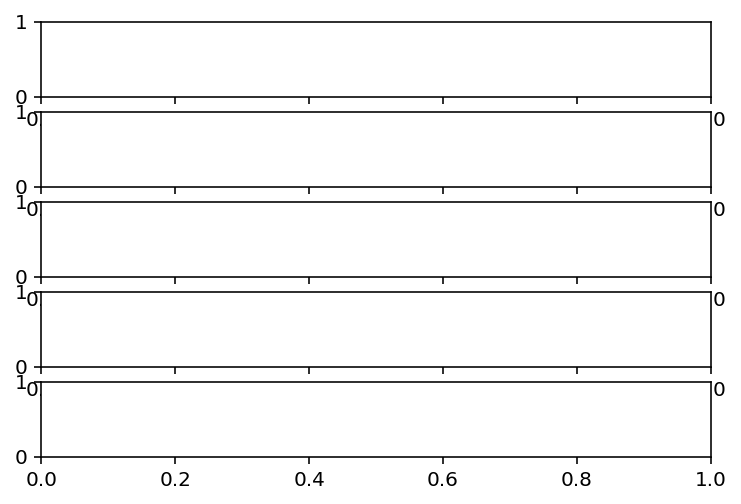

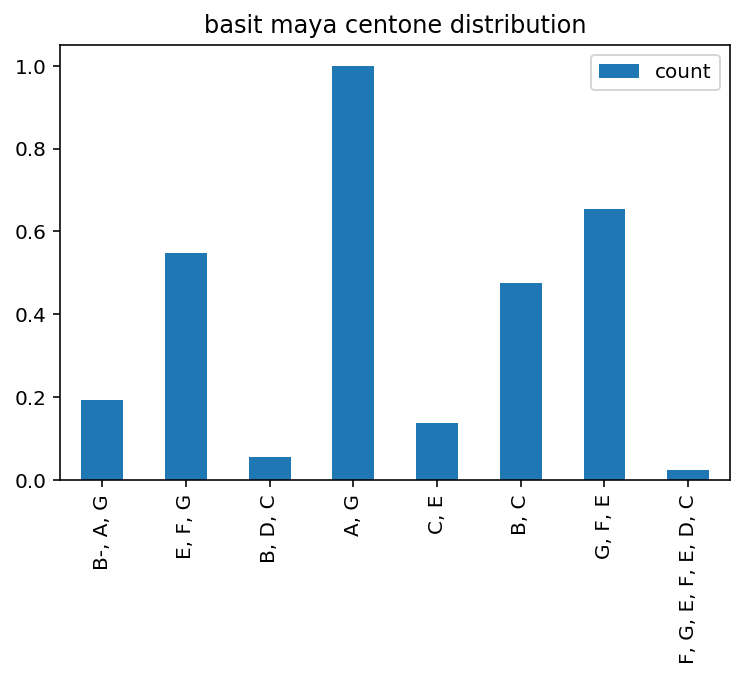

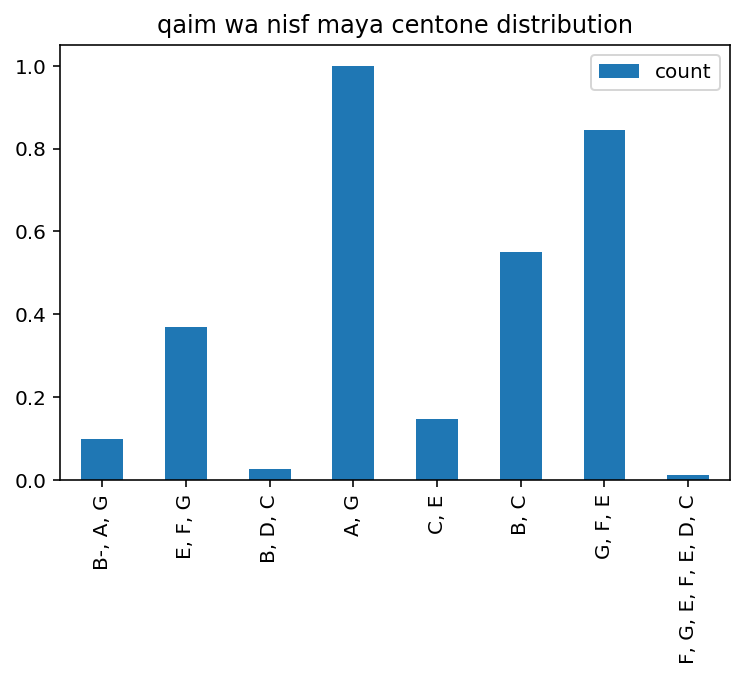

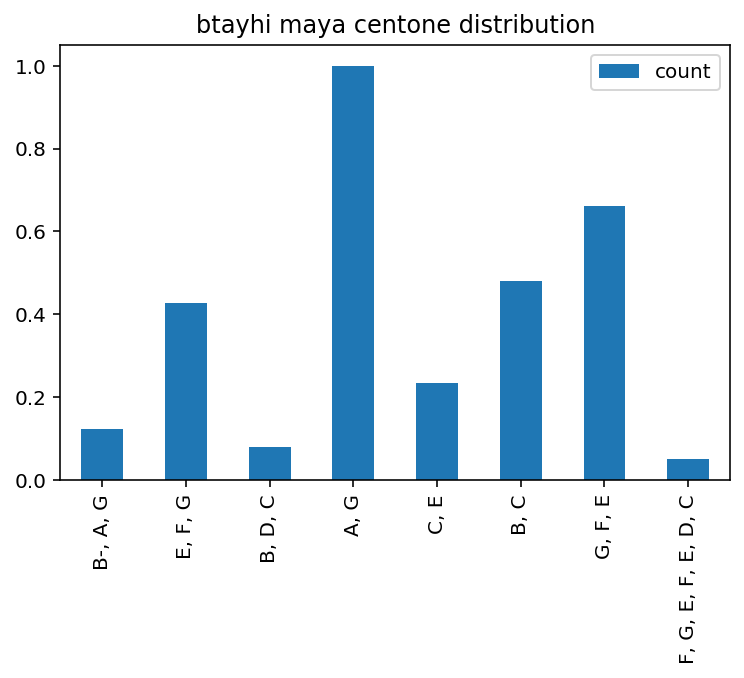

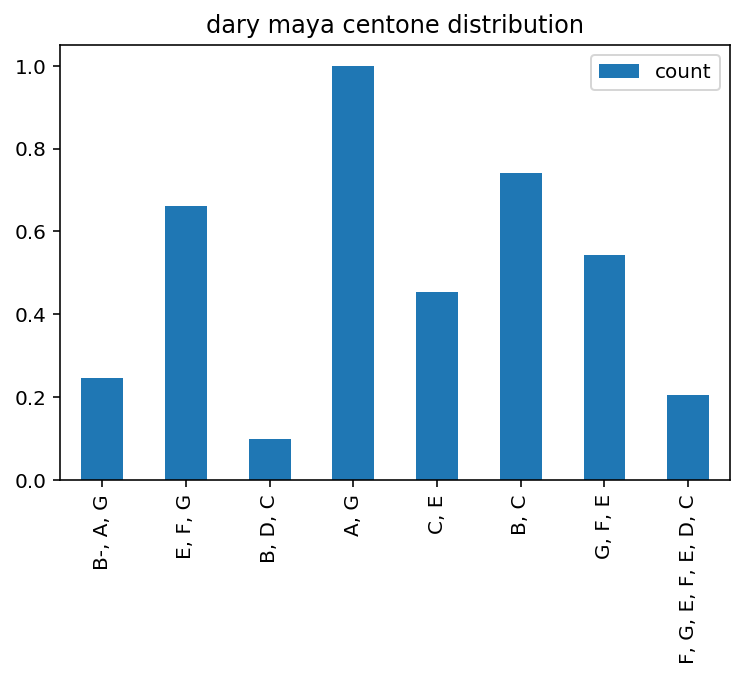

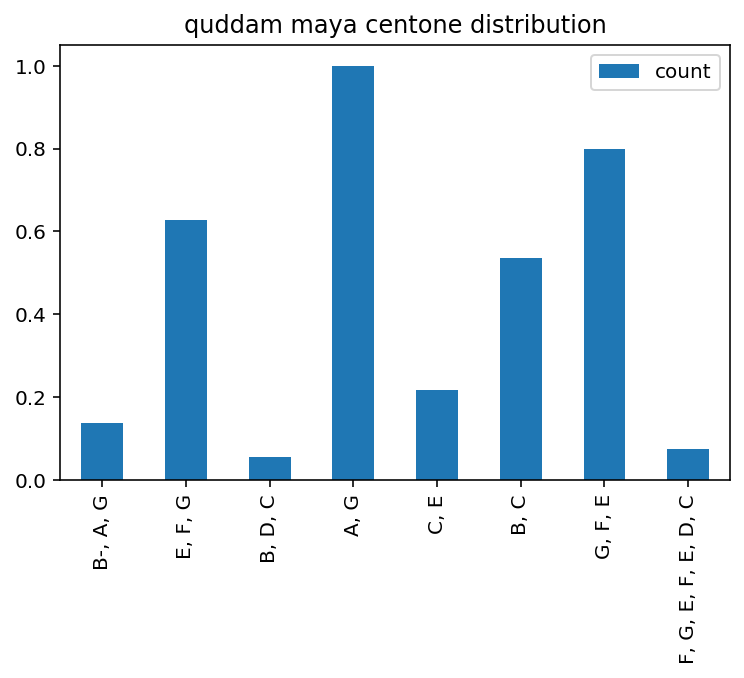

In [21]:
plotDistros('maya',['basit','qaim wa nisf','btayhi','dary','quddam'])

array([<AxesSubplot:title={'center':'mshalia istihlal centone distribution'}>,
       <AxesSubplot:title={'center':'qaim wa nisf istihlal centone distribution'}>,
       <AxesSubplot:title={'center':'btayhi istihlal centone distribution'}>,
       <AxesSubplot:title={'center':'quddam istihlal centone distribution'}>,
       <AxesSubplot:>], dtype=object)

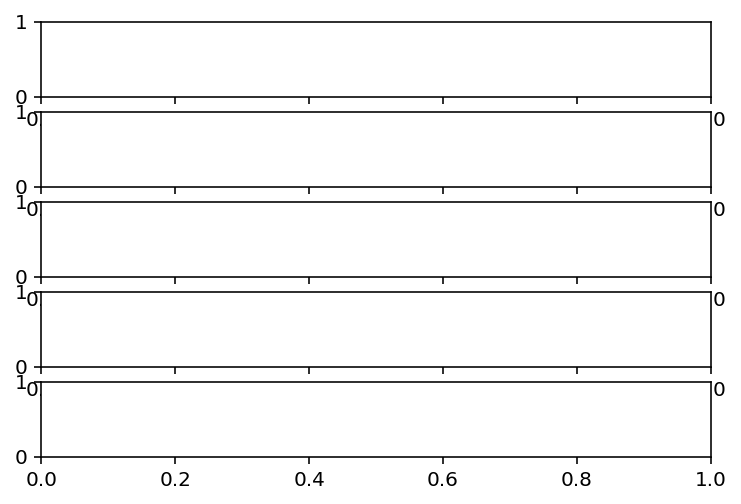

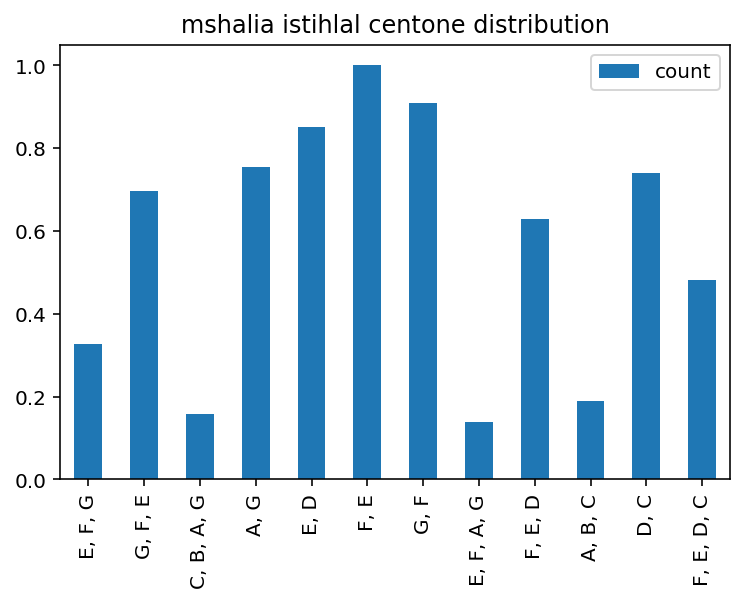

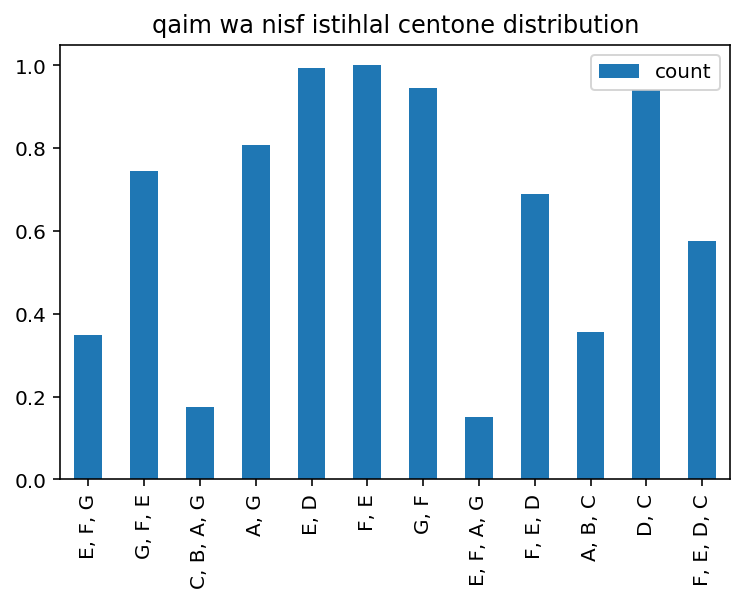

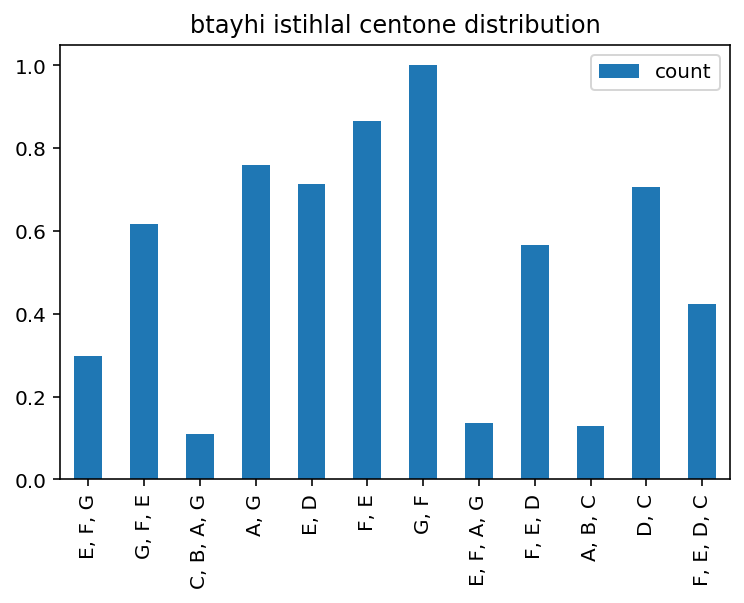

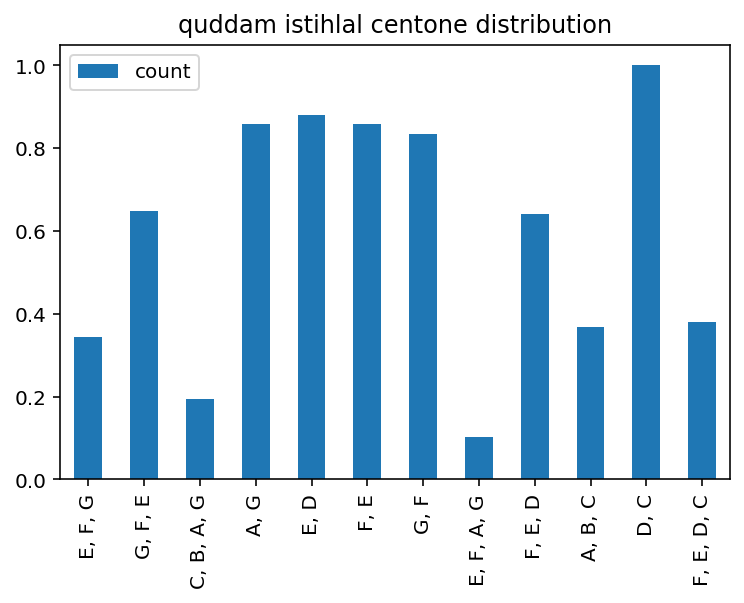

In [22]:
plotDistros('istihlal',['mshalia','qaim wa nisf','btayhi','quddam'])

array([<AxesSubplot:title={'center':'basit gharibat husayn centone distribution'}>,
       <AxesSubplot:title={'center':'qaim wa nisf gharibat husayn centone distribution'}>,
       <AxesSubplot:title={'center':'quddam gharibat husayn centone distribution'}>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

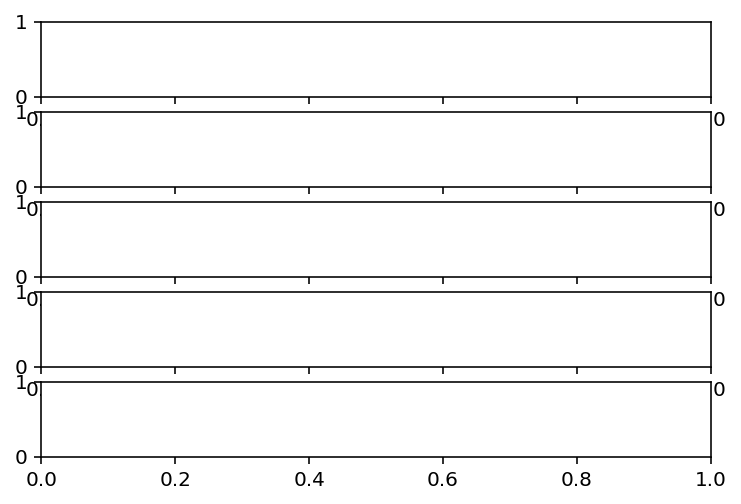

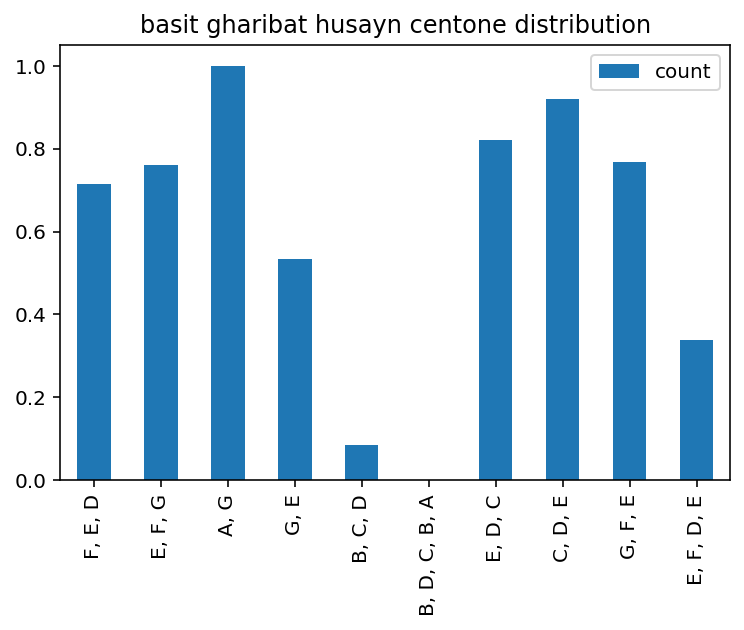

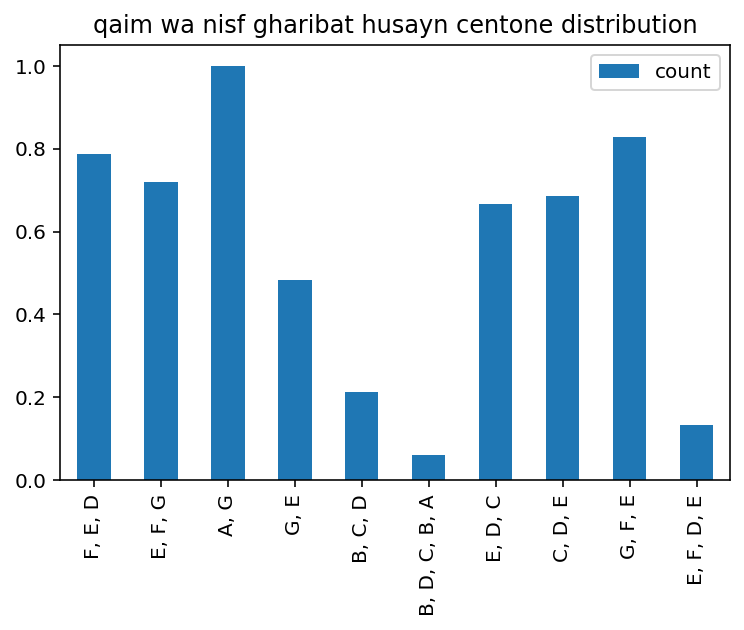

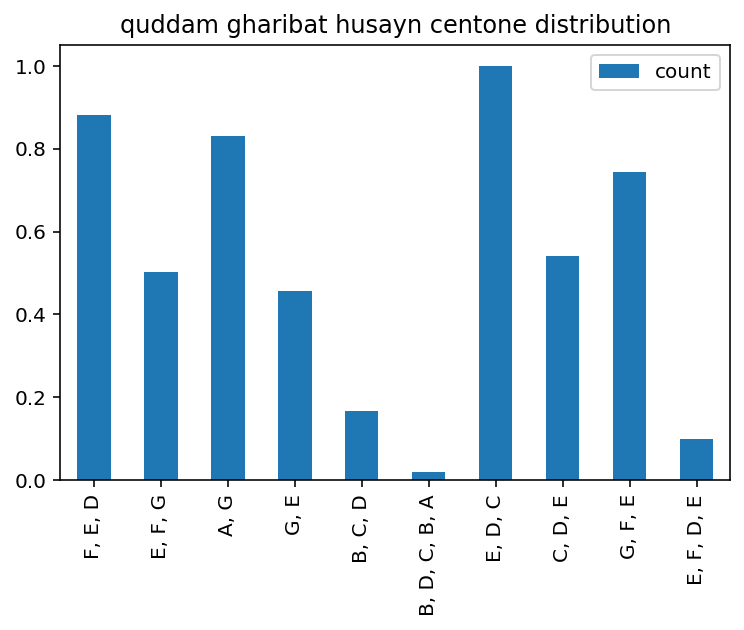

In [23]:
plotDistros('gharibat husayn',['basit','qaim wa nisf','quddam'])